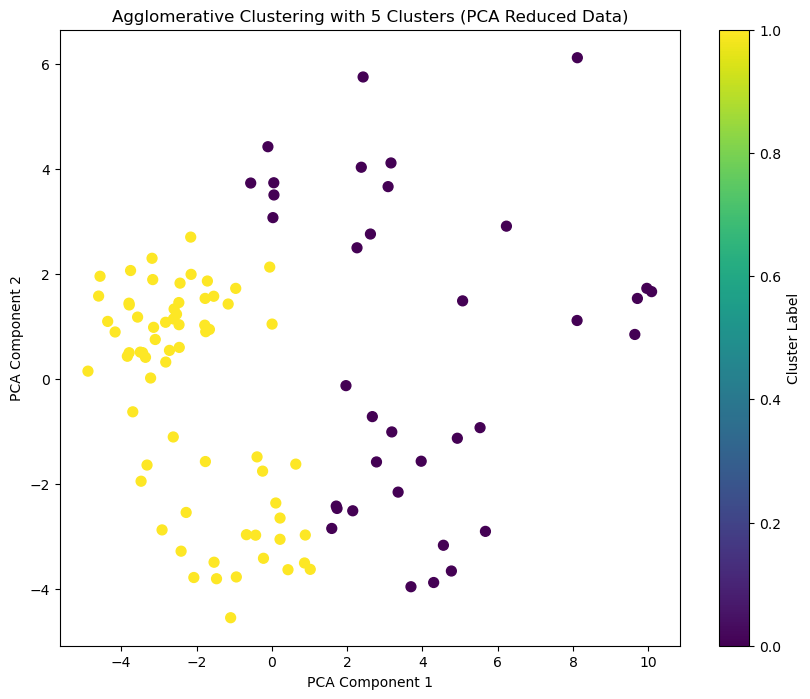

,age,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,ellipsoidVolume,ellipsoidMaxSemiaxis,ellipsoidMidSemiaxis,ellipsoidMinSemiaxis,...,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane,sex,multipleAneurysms,aneurysmLocation,aneurysmType,ruptureStatus,Cluster
0,53,125.259604,120.453515,111.237957,106.759273,21.938237,77.960221,3.5091,2.3718,2.2362,...,0.513167,3.218984,76.670529,4.719235,-1,0,-1,-1,-1,1
1,35,119.002032,122.427263,113.720361,115.774279,18.493788,69.250741,4.3838,2.1032,1.7931,...,0.532819,5.330711,116.839304,15.753911,-1,0,-1,-1,-1,1
2,43,12.740609,23.480617,11.865511,21.853480,6.142748,8.726193,1.4895,1.2775,1.0948,...,0.299136,3.393943,123.657085,9.378066,-1,0,-1,-1,-1,1
3,60,9.376307,18.084625,9.031234,17.295395,4.905063,6.185859,1.5687,1.0935,0.8609,...,0.296743,5.385147,129.829251,27.053597,-1,1,-1,-1,-1,1
4,26,37.934454,54.844592,35.903048,52.303479,9.729065,25.165788,2.5156,1.6261,1.4687,...,0.355401,8.852139,117.065812,23.284114,-1,0,-1,-1,-1,1


In [60]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load the CSV file into a Pandas DataFrame
file_path = "Merged_Aneurysm.csv"
data = pd.read_csv(file_path)

# Define the list of characteristics to be used including rupture status
characteristics_with_rupture = [
    'age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
    'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
    'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
    'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
    'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
    'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
    'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
    'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
    'bifurcationAngleOutOfPlane', 'sex', 'multipleAneurysms', 
    'aneurysmLocation', 'aneurysmType', 'ruptureStatus'
]

# Filter the data to include only the selected characteristics
data = data[characteristics_with_rupture]

# Convert numeric columns that are of object type to numeric
for col in characteristics_with_rupture:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert categorical variables to numeric
categorical_columns = ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']
for col in categorical_columns:
    data[col] = data[col].astype('category').cat.codes

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply Agglomerative Clustering with the optimal configuration
clustering = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='euclidean')
cluster_labels = clustering.fit_predict(pca_data)

# Add the cluster labels to the original data
data['Cluster'] = cluster_labels

# Visualize the clusters in 2D PCA space
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering with 5 Clusters (PCA Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Display the first few rows of the dataset with cluster labels
data.head()


In [61]:
# Display the distribution of cluster labels
cluster_distribution = data['Cluster'].value_counts().sort_index()
cluster_distribution

Cluster
0    36
1    67
Name: count, dtype: int64

In [62]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


# Calculate the silhouette score
silhouette_avg = silhouette_score(pca_data, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Calculate additional cluster evaluation metrics
davies_bouldin = davies_bouldin_score(pca_data, cluster_labels)
calinski_harabasz = calinski_harabasz_score(pca_data, cluster_labels)
print(f'Davies-Bouldin Score: {davies_bouldin:.3f}')
print(f'Calinski-Harabasz Index: {calinski_harabasz:.3f}')

# Calculate the mean position (centroid) of each cluster
centroids = np.array([pca_data[cluster_labels == i].mean(axis=0) for i in range(5)])

Silhouette Score: 0.433
Davies-Bouldin Score: 1.033
Calinski-Harabasz Index: 82.678


C:\Users\shrin\AppData\Local\Temp\ipykernel_323008\1779757407.py:22: RuntimeWarning: Mean of empty slice.
  centroids = np.array([pca_data[cluster_labels == i].mean(axis=0) for i in range(5)])
c:\Users\shrin\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [63]:
data.head()

,age,sacVolume,sacSurfaceArea,vdcVolume,vdcSurfaceArea,sacSectionArea,ellipsoidVolume,ellipsoidMaxSemiaxis,ellipsoidMidSemiaxis,ellipsoidMinSemiaxis,...,maxCurvature,maxTorsion,bifurcationAngleInPlane,bifurcationAngleOutOfPlane,sex,multipleAneurysms,aneurysmLocation,aneurysmType,ruptureStatus,Cluster
0,53,125.259604,120.453515,111.237957,106.759273,21.938237,77.960221,3.5091,2.3718,2.2362,...,0.513167,3.218984,76.670529,4.719235,-1,0,-1,-1,-1,1
1,35,119.002032,122.427263,113.720361,115.774279,18.493788,69.250741,4.3838,2.1032,1.7931,...,0.532819,5.330711,116.839304,15.753911,-1,0,-1,-1,-1,1
2,43,12.740609,23.480617,11.865511,21.853480,6.142748,8.726193,1.4895,1.2775,1.0948,...,0.299136,3.393943,123.657085,9.378066,-1,0,-1,-1,-1,1
3,60,9.376307,18.084625,9.031234,17.295395,4.905063,6.185859,1.5687,1.0935,0.8609,...,0.296743,5.385147,129.829251,27.053597,-1,1,-1,-1,-1,1
4,26,37.934454,54.844592,35.903048,52.303479,9.729065,25.165788,2.5156,1.6261,1.4687,...,0.355401,8.852139,117.065812,23.284114,-1,0,-1,-1,-1,1


In [64]:
from scipy.spatial.distance import pdist, squareform

# Calculate Intercluster and Intracluster Distances
centroids = np.array([pca_data[cluster_labels == i].mean(axis=0) for i in range(5)])
intercluster_distances = pdist(centroids, metric='euclidean')
intracluster_distances = np.array([np.mean(pdist(pca_data[cluster_labels == i], metric='euclidean')) for i in range(5)])

# Calculate Cluster Spread Index (CSI)
csi = np.sum(intracluster_distances) / np.sum(intercluster_distances)
print(f'Cluster Spread Index (CSI): {csi:.3f}')

# Calculate Dunn Index
dunn_index = np.min(intercluster_distances) / np.max(intracluster_distances)
print(f'Dunn Index: {dunn_index:.3f}')


Cluster Spread Index (CSI): nan
Dunn Index: nan


C:\Users\shrin\AppData\Local\Temp\ipykernel_323008\2825839088.py:4: RuntimeWarning: Mean of empty slice.
  centroids = np.array([pca_data[cluster_labels == i].mean(axis=0) for i in range(5)])
c:\Users\shrin\anaconda3\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\shrin\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\shrin\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Mutual Information Scores with Cluster Labels:
multipleAneurysms: 0.006
aneurysmLocation: 0.000
aneurysmType: 0.000
ruptureStatus: 0.000


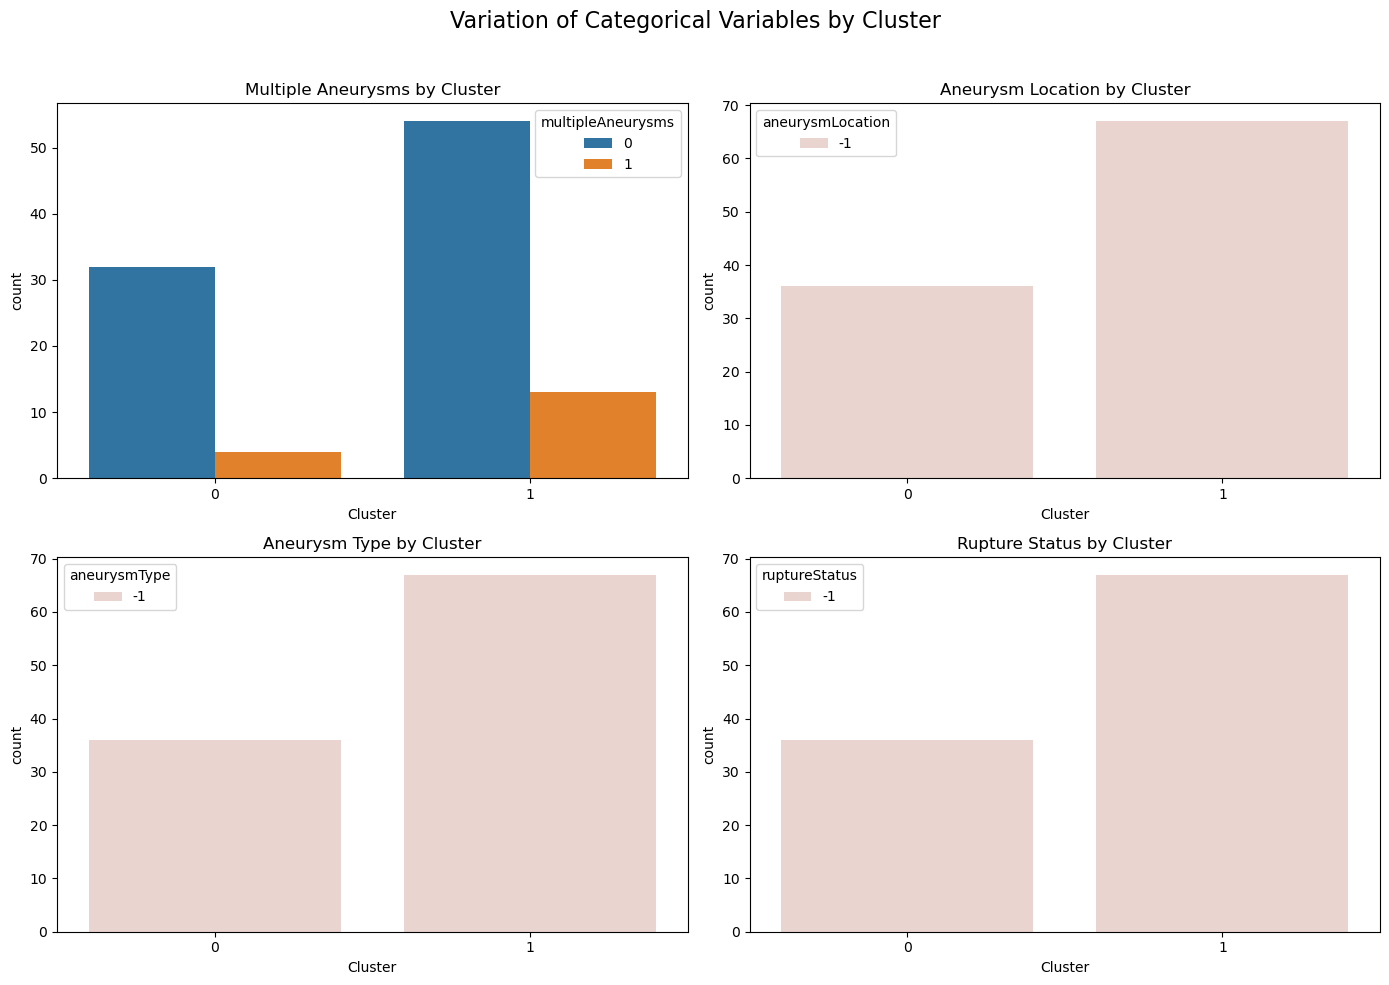

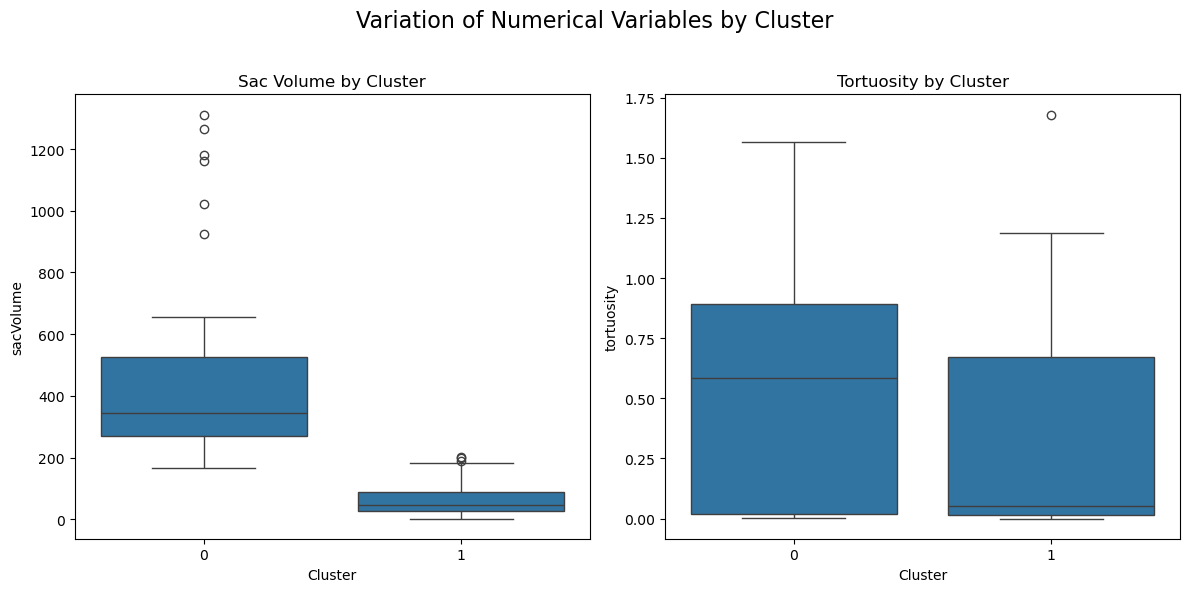

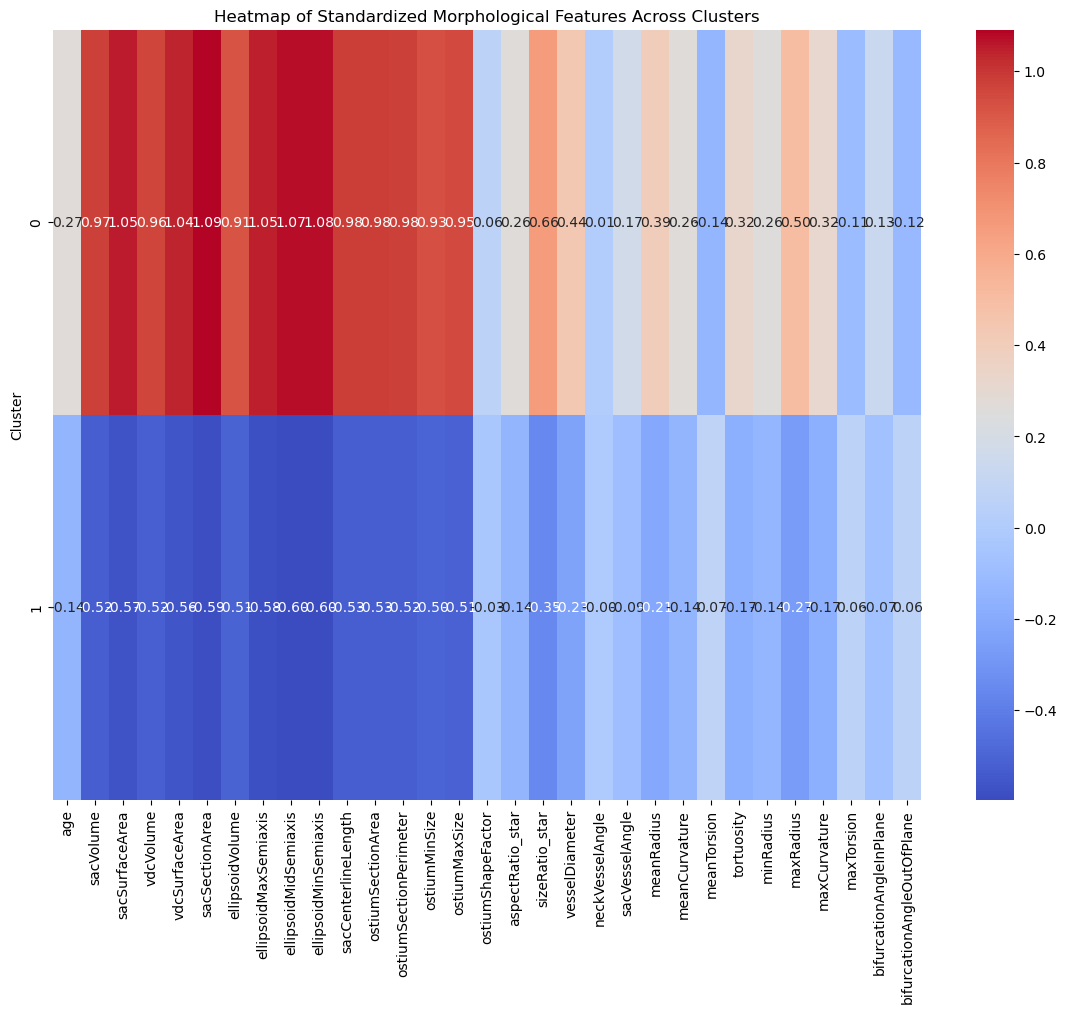

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mutual_info_score
from sklearn.impute import SimpleImputer

# Load the data (Assumed already loaded and preprocessed from your previous code)

# Task 1: Calculate Mutual Information between clusters and categorical variables
categorical_columns = ['multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']
mi_scores = {}
for col in categorical_columns:
    mi_scores[col] = mutual_info_score(data['Cluster'], data[col])

# Display the mutual information scores
print("Mutual Information Scores with Cluster Labels:")
for col, score in mi_scores.items():
    print(f"{col}: {score:.3f}")

# Task 2: Analyze how categorical and numerical variables vary across clusters
# Categorical: Bar plots for 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus'
# Numerical: Box plots for 'sacVolume', 'tortuosity'

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Variation of Categorical Variables by Cluster", fontsize=16)

sns.countplot(x='Cluster', hue='multipleAneurysms', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Multiple Aneurysms by Cluster')

sns.countplot(x='Cluster', hue='aneurysmLocation', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Aneurysm Location by Cluster')

sns.countplot(x='Cluster', hue='aneurysmType', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Aneurysm Type by Cluster')

sns.countplot(x='Cluster', hue='ruptureStatus', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Rupture Status by Cluster')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Numerical: Boxplot for 'sacVolume' and 'tortuosity'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Variation of Numerical Variables by Cluster", fontsize=16)

sns.boxplot(x='Cluster', y='sacVolume', data=data, ax=axes[0])
axes[0].set_title('Sac Volume by Cluster')

sns.boxplot(x='Cluster', y='tortuosity', data=data, ax=axes[1])
axes[1].set_title('Tortuosity by Cluster')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Task 3: Heatmap of standardized morphological features across clusters
morphological_features = [
    'age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
    'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
    'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
    'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
    'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
    'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
    'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
    'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
    'bifurcationAngleOutOfPlane'
]

# Scale the morphological features
scaler = StandardScaler()
scaled_morph_data = scaler.fit_transform(data[morphological_features])

# Create a DataFrame with the scaled data and cluster labels
morph_df = pd.DataFrame(scaled_morph_data, columns=morphological_features)
morph_df['Cluster'] = data['Cluster']

# Create the heatmap
plt.figure(figsize=(14, 10))
morphological_mean_by_cluster = morph_df.groupby('Cluster').mean()
sns.heatmap(morphological_mean_by_cluster, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Standardized Morphological Features Across Clusters')
plt.show()


In [66]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the CSV file into a Pandas DataFrame
file_path = "Merged_Aneurysm.csv"
data = pd.read_csv(file_path)

# Define the list of characteristics to be used including rupture status
characteristics_with_rupture = ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                                'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                                'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                                'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                                'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                                'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                                'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                                'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                                'bifurcationAngleOutOfPlane', 'sex', 'multipleAneurysms', 
                                'aneurysmLocation', 'aneurysmType', 'ruptureStatus']

# Filter the data to include only the selected characteristics
data = data[characteristics_with_rupture]

# Store mappings before converting categorical variables to numeric
label_mappings = {}
for col in ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']:
    data[col] = data[col].astype('category')
    label_mappings[col] = dict(enumerate(data[col].cat.categories))
    data[col] = data[col].cat.codes

# Convert numeric columns that are of object type to numeric
for col in ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea', 
            'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 
            'sacCenterlineLength', 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
            'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 'vesselDiameter', 
            'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 'meanCurvature', 'meanTorsion', 'tortuosity', 
            'minRadius', 'maxRadius', 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
            'bifurcationAngleOutOfPlane', 'ruptureStatus']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values by filling them with a specific placeholder
data.fillna(-1, inplace=True)

# Add cluster labels to the data for further analysis
data['Cluster'] = cluster_labels

# Reverse map the numerical codes back to original labels using stored mappings
for col, mapping in label_mappings.items():
    data[col] = data[col].map(mapping)

# Function to calculate the distribution of categorical variables within clusters and add p-values
def calculate_cluster_distribution_with_pvalues(data, categorical_vars):
    cluster_summary = {}

    for var in categorical_vars:
        # Cross-tabulate to get counts
        crosstab = pd.crosstab(data[var], data['Cluster'])
        
        # Perform the Chi-square test
        chi2, p, dof, expected = chi2_contingency(crosstab)
        
        # Add the p-value as an additional column to the crosstab
        crosstab['p-value'] = p
        
        # Append the result
        cluster_summary[var] = crosstab

    return cluster_summary

# Updated list of categorical variables
categorical_vars = ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']

# Calculate the distribution within clusters and add p-values
cluster_distribution = calculate_cluster_distribution_with_pvalues(data, categorical_vars)

# Combine the individual distributions into a single DataFrame for display
cluster_distribution_df = pd.concat(cluster_distribution, axis=0)

# Rename the index to reflect original variable names
cluster_distribution_df.index.names = ['Category', 'Subcategory']

# Display the table with p-values
cluster_distribution_df


Cluster                         0   1   p-value
Category          Subcategory                  
sex               F            22  43  0.925463
                  M            14  24  0.925463
multipleAneurysms False        32  54  0.422224
                  True          4  13  0.422224
aneurysmLocation  ACA           9  15  0.027793
                  BAS           1   6  0.027793
                  ICA          22  24  0.027793
                  MCA           4  22  0.027793
aneurysmType      LAT          22  18  0.001431
                  TER          14  49  0.001431
ruptureStatus     R            12  32  0.229151
                  U            24  35  0.229151